In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

In [50]:
data = pd.read_csv("news.csv")

In [51]:
print(data.head())
print(data.dtypes)
print(data.shape)
print(data.isna().values.any())

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  
Unnamed: 0     int64
title         object
text          object
label         object
dtype: object
(6335, 4)
False


In [52]:
data.columns = ['id','title','texts', 'target']
print(data.head())

      id                                              title  \
0   8476                       You Can Smell Hillary’s Fear   
1  10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2   3608        Kerry to go to Paris in gesture of sympathy   
3  10142  Bernie supporters on Twitter erupt in anger ag...   
4    875   The Battle of New York: Why This Primary Matters   

                                               texts target  
0  Daniel Greenfield, a Shillman Journalism Fello...   FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...   FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...   REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...   FAKE  
4  It's primary day in New York and front-runners...   REAL  


In [53]:
print(data.target.head())
print(data.title.head())
print(data.texts.head())
print(data.id.head())

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: target, dtype: object
0                         You Can Smell Hillary’s Fear
1    Watch The Exact Moment Paul Ryan Committed Pol...
2          Kerry to go to Paris in gesture of sympathy
3    Bernie supporters on Twitter erupt in anger ag...
4     The Battle of New York: Why This Primary Matters
Name: title, dtype: object
0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: texts, dtype: object
0     8476
1    10294
2     3608
3    10142
4      875
Name: id, dtype: int64


Text(0, 0.5, 'total text')

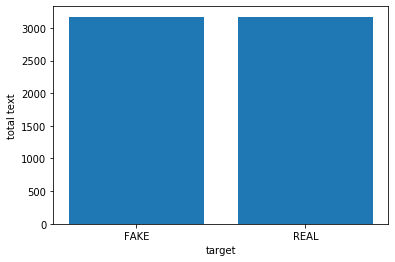

In [54]:
target_count = data.groupby("target").count()
plt.bar(target_count.index.values, target_count["texts"])
plt.xlabel('target')
plt.ylabel('total text')

In [56]:
x_train, x_test, y_train, y_test = train_test_split(data['texts'], data['target'], test_size = 0.2, random_state = 1)

In [57]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = TfidfVectorizer(lowercase = True, stop_words = 'english', ngram_range = (1,2), tokenizer = token.tokenize)
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)
print(texts)

  (0, 193870)	0.03191597523653359
  (0, 38068)	0.03191597523653359
  (0, 683897)	0.017294344514775392
  (0, 478314)	0.025322735750700896
  (0, 202994)	0.03191597523653359
  (0, 819156)	0.03191597523653359
  (0, 67876)	0.03191597523653359
  (0, 247272)	0.03191597523653359
  (0, 411602)	0.030487764182023893
  (0, 543819)	0.03191597523653359
  (0, 1306572)	0.03191597523653359
  (0, 1243393)	0.025604678333789297
  (0, 368371)	0.024377802183003738
  (0, 472304)	0.01803214011140012
  (0, 766100)	0.024591346464181697
  (0, 1266174)	0.028688431050269494
  (0, 962706)	0.02750324061521528
  (0, 1556114)	0.030487764182023893
  (0, 1590366)	0.029474432312416296
  (0, 139594)	0.03191597523653359
  (0, 274519)	0.03191597523653359
  (0, 1351054)	0.028046221257906595
  (0, 1267317)	0.03191597523653359
  (0, 1504841)	0.03191597523653359
  (0, 1490932)	0.03191597523653359
  :	:
  (6334, 1019971)	0.014647825692911832
  (6334, 1554836)	0.009140332061938752
  (6334, 947108)	0.00950524417091795
  (6334, 781

In [58]:

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr').fit(x_train, y_train)))
models.append(('KNN', KNeighborsClassifier().fit(x_train, y_train)))
models.append(('CART', DecisionTreeClassifier().fit(x_train, y_train)))
models.append(('MNB',MultinomialNB().fit(x_train, y_train)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.904684 (0.014013)
KNN: 0.521512 (0.006210)
CART: 0.819646 (0.021629)
MNB: 0.799326 (0.012993)


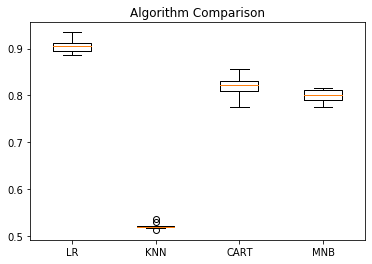

In [59]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


In [60]:
clf = LogisticRegression(solver='liblinear', multi_class='ovr').fit(x_train, y_train)

In [61]:
predicted = clf.predict(x_test)
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[591  60]
 [ 44 572]]
              precision    recall  f1-score   support

        FAKE       0.93      0.91      0.92       651
        REAL       0.91      0.93      0.92       616

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267

